Druk op ctrl+shift+J in Chrome en copy paste deze javascript code
Deze code zoekt naar alle urls en zet ze in een bestandje onder elkaar, gescheiden door newlines (\n)
```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```
Druk op Enter

In [2]:
# imports voor python
import urllib.request 
import uuid
import os
from PIL import Image
from shutil import copyfile
import random


# our high level variables
training_images_per_class = 256
test_images_per_class = 64
basepath='C:/test/classifier/dataset'

# create the download path for picture files
basepath_download = f'{basepath}/download'
if not os.path.isdir(basepath_download):
    os.makedirs(basepath_download)

In [3]:
# change this for every new class you download. e.g. marley, cat, tree
class_names = ['tree', 'cat']

print (f'Proceeding to download {class_names} images at best effort :-)')
print (f'I promise I will stop at {training_images_per_class} training images and {test_images_per_class} test images per class, totalling {training_images_per_class + test_images_per_class} images')
print ('------------------------------------------')
for class_name in class_names:
    print ('')
    print (f'Downloading {class_name}')
    print ('------------------------------------------')
    # open the downloaded chrome file with all the urls
    f=open(f'{basepath_download}/{class_name}','r')

    # make sure training and test sub paths exist. Careful, if you execute this code twice it will simply add new files. Old files will not be deleted
    basepath_training = f'{basepath}/training_set/{class_name}' 
    basepath_test = f'{basepath}/test_set/{class_name}' 
    basepath_single_prediction = f'{basepath}/single_prediction/{class_name}' 

    if not os.path.isdir(basepath_training):
        os.makedirs(basepath_training)
    if not os.path.isdir(basepath_test):
        os.makedirs(basepath_test)
    if not os.path.isdir(basepath_single_prediction):
        os.makedirs(basepath_single_prediction)

    # download each file
    count=0
    for url in f:
        # limit to xxx images, download extra images for testing purposes
        if count>=training_images_per_class+test_images_per_class:
            break;

        # check where to download the image to
        new_uuid = uuid.uuid4()
        type_download = ''
        if count+1<= training_images_per_class:
            filename = f'{basepath_training}/{new_uuid}.png' 
            type_download = 'training'
        else:
            filename = f'{basepath_test}/{new_uuid}.png' 
            type_download = 'test'

        # the actual download. Make sure files are not corrupted
        try:
            # download the file
            urllib.request.urlretrieve(url, filename)

            # check if the file is ok
            img = Image.open(filename) 
            img.verify() 

            # for 20% of the test images, copy to single prediction
            if (type_download == 'test' and random.randint(0, 100)<10):
                sp_file = f'{basepath_single_prediction}/{new_uuid}.png' 
                copyfile(filename, sp_file)
                print ("single prediction copy included")

            count+= 1
            print (count, f"Downloaded and verified {type_download}")

        except Exception as e:
            # remove the corrupt file if it exists
            if os.path.isfile(filename):
                os.remove(filename)
            print (count, 'Failed to download', e, ':-(')

    print (f'Done downloading {class_name}! Total of {count} images')
    
print ('Done downloading everything, congratulations!!')

Proceeding to download ['tree', 'cat'] images at best effort :-)
I promise I will stop at 256 training images and 64 test images per class, totalling 320 images
------------------------------------------

------------------------------------------
1 Downloaded and verified training
2 Downloaded and verified training
3 Downloaded and verified training
4 Downloaded and verified training
5 Downloaded and verified training
6 Downloaded and verified training
7 Downloaded and verified training
7 Failed to download HTTP Error 403: Forbidden :-(
8 Downloaded and verified training
9 Downloaded and verified training
10 Downloaded and verified training
11 Downloaded and verified training
12 Downloaded and verified training
13 Downloaded and verified training
14 Downloaded and verified training
15 Downloaded and verified training
16 Downloaded and verified training
17 Downloaded and verified training
18 Downloaded and verified training
19 Downloaded and verified training
20 Downloaded and verified

153 Downloaded and verified training
154 Downloaded and verified training
155 Downloaded and verified training
156 Downloaded and verified training
156 Failed to download HTTP Error 403: Forbidden :-(
157 Downloaded and verified training
158 Downloaded and verified training
159 Downloaded and verified training
160 Downloaded and verified training
161 Downloaded and verified training
162 Downloaded and verified training
163 Downloaded and verified training
164 Downloaded and verified training
165 Downloaded and verified training
166 Downloaded and verified training
167 Downloaded and verified training
168 Downloaded and verified training
169 Downloaded and verified training
170 Downloaded and verified training
171 Downloaded and verified training
172 Downloaded and verified training
173 Downloaded and verified training
174 Downloaded and verified training
174 Failed to download HTTP Error 403: Forbidden :-(
175 Downloaded and verified training
176 Downloaded and verified training
177 Do

C:\Users\mvanderuitenbeek\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:2655: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


315 Failed to download cannot identify image file 'C:/test/classifier/dataset/test_set/tree/2f4cc8ce-6ada-4641-990e-0c86d9bb5cce.png' :-(
316 Downloaded and verified test
317 Downloaded and verified test
318 Downloaded and verified test
319 Downloaded and verified test
320 Downloaded and verified test
Done downloading tree! Total of 320 images

------------------------------------------
1 Downloaded and verified training
2 Downloaded and verified training
3 Downloaded and verified training
4 Downloaded and verified training
5 Downloaded and verified training
6 Downloaded and verified training
7 Downloaded and verified training
8 Downloaded and verified training
9 Downloaded and verified training
9 Failed to download HTTP Error 403: Forbidden :-(
10 Downloaded and verified training
11 Downloaded and verified training
12 Downloaded and verified training
13 Downloaded and verified training
14 Downloaded and verified training
15 Downloaded and verified training
16 Downloaded and verified t

158 Failed to download HTTP Error 403: Forbidden :-(
159 Downloaded and verified training
160 Downloaded and verified training
161 Downloaded and verified training
162 Downloaded and verified training
163 Downloaded and verified training
164 Downloaded and verified training
165 Downloaded and verified training
166 Downloaded and verified training
166 Failed to download HTTP Error 403: Forbidden :-(
167 Downloaded and verified training
168 Downloaded and verified training
168 Failed to download HTTP Error 403: Forbidden :-(
168 Failed to download HTTP Error 403: Forbidden :-(
169 Downloaded and verified training
170 Downloaded and verified training
171 Downloaded and verified training
172 Downloaded and verified training
173 Downloaded and verified training
174 Downloaded and verified training
175 Downloaded and verified training
176 Downloaded and verified training
177 Downloaded and verified training
178 Downloaded and verified training
178 Failed to download HTTP Error 403: Forbidden

In [4]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential() # simpel model met layers lineair achter elkaar
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 1), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(f'{basepath}/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 color_mode='grayscale', # dit is veel sneller dan rgb
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(f'{basepath}/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            color_mode='grayscale', # dit is veel sneller dan rgb
                                            class_mode = 'binary')
history = classifier.fit_generator(training_set, 
                         steps_per_epoch = training_images_per_class/32, # number of images per class / batch size
                         epochs = 2, # number of times you expose the full dataset to the neural network
                         validation_data = test_set,
                         validation_steps = test_images_per_class)

Found 567 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Epoch 1/2
8/8 [==============================] - 41s 5s/step - loss: 0.6653 - acc: 0.5703 - val_loss: 0.5992 - val_acc: 0.6172
Epoch 2/2
8/8 [==============================] - 41s 5s/step - loss: 0.6266 - acc: 0.6250 - val_loss: 0.5647 - val_acc: 0.6250


[]

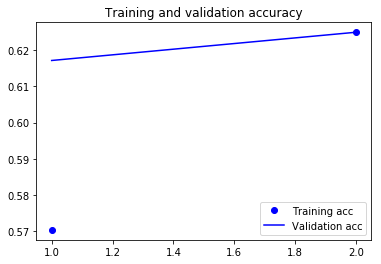

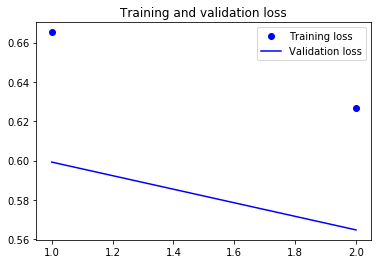

In [8]:
from matplotlib import pyplot as plt
# get results from training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# plot the accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# plot the loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# print the result to screen
plt.plot()

I trained these classifications: {'cat': 0, 'tree': 1}
04980ce8-46f3-4fe7-9a6c-dbf4a839addd.png


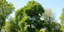

'I believe this is tree'

096ab2f4-63aa-4f54-9bd8-4e249fef4e75.png


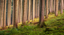

'I believe this is tree'

14785398-cb11-4628-997c-7b703a0b342c.png


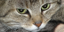

'I believe this is tree'

288462ce-54d0-4307-b909-a2d2511e0e0c.png


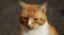

'I believe this is cat'

362bf29c-531b-47b2-b072-6907961de906.png


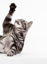

'no idea'

36c2b1a7-df22-47ae-8088-18d22779200e.png


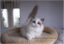

'I believe this is cat'

40b59b02-daec-4d2e-9389-4cc5940bc886.png


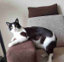

'I believe this is tree'

4a1ddcd7-7979-42b6-ac16-3fe8cb170f21.png


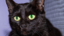

'I believe this is tree'

5723cb9c-2d2a-4025-9aae-b6253e24df0e.png


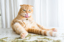

'I believe this is cat'

5bd5c377-faa8-43b4-b327-021ad60d82a1.png


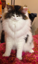

'I believe this is cat'

86553ded-70ad-44ae-9a81-186a3cb64005.png


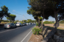

'I believe this is tree'

8f45a932-fb8a-4198-888a-ea8a490fa8ce.png


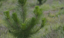

'no idea'

a78ed962-95a6-46be-a8a1-9006f2e80889.png


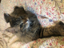

'I believe this is tree'

ba0a2ddc-4281-44b8-8746-2c97d54d84af.png


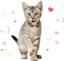

'no idea'

c3267e5b-9c64-4cf2-9ca5-e335d5327008.png


'I believe this is tree'

c77bcd73-3dd5-4552-b6cc-bef218014089.png


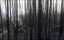

'I believe this is tree'

cdac2fdd-9159-439e-84ea-4cb96006f56c.png


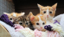

'no idea'

eb341a8f-53ae-4c6e-ba80-64fc1c1ca82e.png


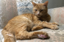

'no idea'

In [11]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image

single_prediction_path=f'{basepath}/single_prediction/'
files = os.listdir(single_prediction_path)

# list the categories that were trained (cat, elvis, dog etc)
classifications=training_set.class_indices
print ("I trained these classifications:", classifications)

# now iterate through all the images we want analysed in the single_prediction folder and predict their classification
for file in files:
    # predict and save result
    print(file)
    test_image = image.load_img(single_prediction_path+file, target_size = (64, 64), grayscale=True)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)

    # see what folder name (class) the result belongs to
    prediction = "no idea"
    for classification in classifications:
        if classifications[classification] == result:
            prediction = 'I believe this is ' + classification
            break

    # show the image and the prediction
    pil_im = Image.open(single_prediction_path+file)
    pil_im.thumbnail((64,64))
    display(pil_im, prediction)
